In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from igsm.dataset import igsmDataset
from igsm.core.structure_graph import StructureGraph
from igsm.core.dependency_graph import DependencyGraph
from igsm.config import DEFAULT_CONFIG

In [32]:
def visualize_structure_graph(structure):
    G = nx.Graph()
    for category, items in structure.items():
        G.add_node(category, color='lightblue', size=2000)
        for item in items:
            item_name = f"{item['name']}"
            G.add_node(item_name, color='lightgreen', size=1000)
            G.add_edge(category, item_name)
    
    pos = nx.spring_layout(G)
    colors = [G.nodes[node]['color'] for node in G.nodes()]
    sizes = [G.nodes[node]['size'] for node in G.nodes()]
    
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, node_color=colors, node_size=sizes, with_labels=True, font_size=8)
    plt.title("Structure Graph")
    plt.show()

def visualize_dependency_graph(dependency_graph):
    G = nx.DiGraph()
    for param, info in dependency_graph.items():
        G.add_node(param)
        for dep in info['dependencies']:
            G.add_edge(dep, param)
    
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=8, arrows=True)
    plt.title("Dependency Graph")
    plt.show()

In [33]:
dataset = igsmDataset(DEFAULT_CONFIG)
problem = dataset.generate(num_problems=1)

In [38]:
dataset.config

{'structure_layers': 4,
 'min_items_per_layer': 1,
 'max_items_per_layer': 3,
 'max_operations': 15,
 'arithmetic_mod': 23,
 'min_dependencies': 0,
 'max_dependencies': 3,
 'operations': ['+', '-', '*'],
 'constant_probability': 0.2,
 'query_type': 'random'}

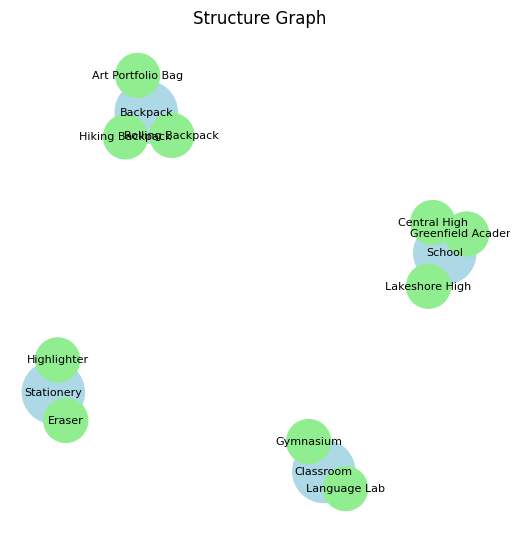

In [34]:
structure_graph = StructureGraph(DEFAULT_CONFIG)
structure = structure_graph.generate()
visualize_structure_graph(structure)

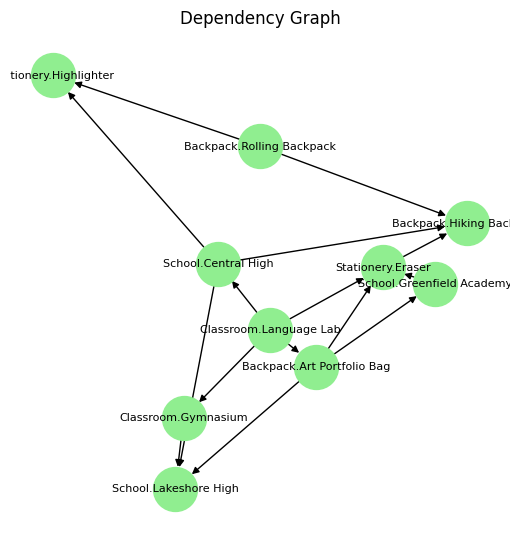

In [35]:
dependency_graph = DependencyGraph(DEFAULT_CONFIG)
dependencies = dependency_graph.generate(structure)
visualize_dependency_graph(dependencies)

In [36]:
print("Generated Problem:")
print(problem[0].statement)
print("\nSolution:")
print(problem[0].solution)

Generated Problem:
The number of Highlighter in each Stationery is 6 times the number of Rolling Backpack in each Backpack. The number of Math Classroom in each Classroom is the difference between the number of Riverview High in each School and the sum of Rolling Backpack in each Backpack. The number of Pen in each Stationery is 2 times the number of Library in each Classroom. The number of Library in each Classroom is 19. The number of Riverview High in each School is 2 less than the number of Library in each Classroom. The number of Rolling Backpack in each Backpack is the difference between the number of Pen in each Stationery and the sum of Library in each Classroom, Riverview High in each School. The number of Messenger Bag in each Backpack is the sum of the number of Pen in each Stationery, Riverview High in each School and Highlighter in each Stationery. How many Highlighter does Stationery have?

Solution:
Define Library in each Classroom as a; so a = 19.
Define Pen in each Sta